### Time Series Analysis

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Time Series Decomposition

In [3]:
import pandas as pd

df = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


### Visualize Time Series Data

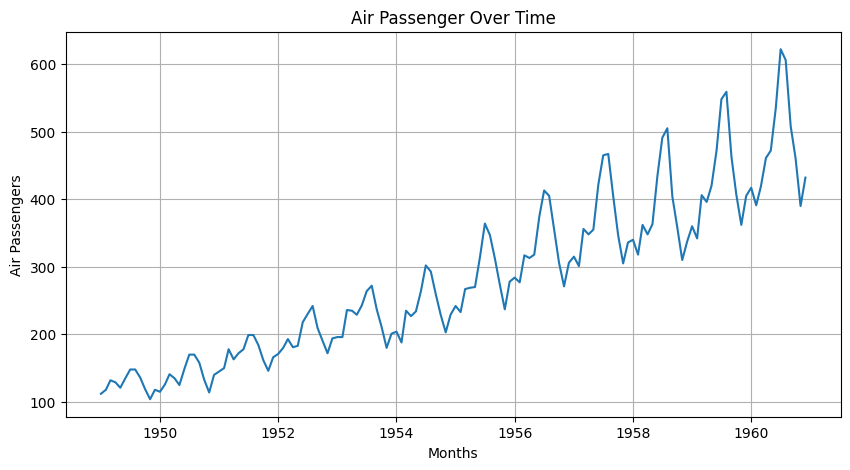

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df['Passengers'])
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Air Passenger Over Time')
plt.grid()
plt.show()

### Decomposition

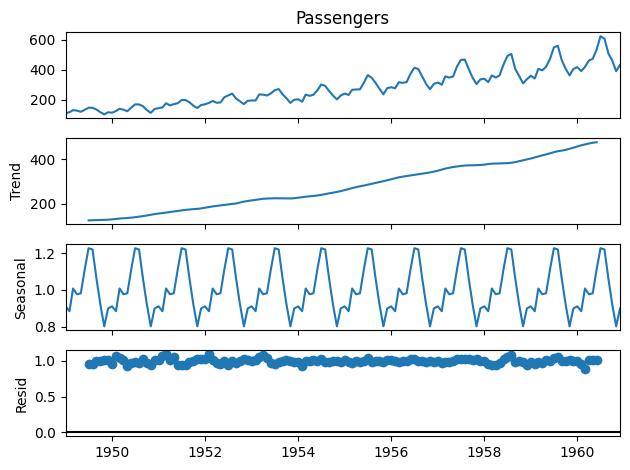

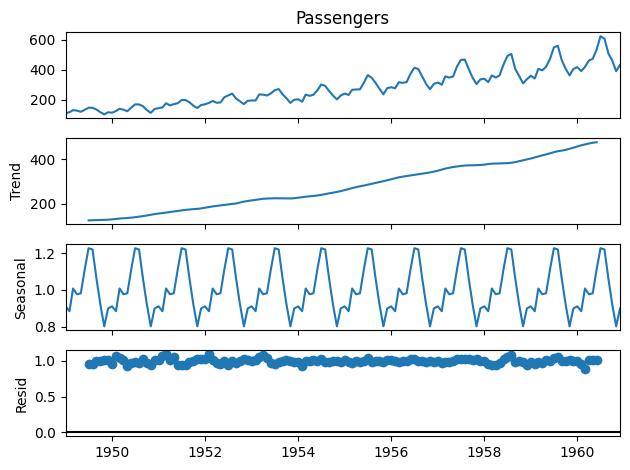

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(df['Passengers'], model='multiplicative')
Q.plot()

In [8]:
Q.observed

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: Passengers, Length: 144, dtype: float64

In [9]:
Q.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [11]:
Q.resid[10:]

Month
1949-11-01    1.006270
1949-12-01    1.011812
1950-01-01    0.962603
1950-02-01    1.071467
1950-03-01    1.037447
                ...   
1960-08-01         NaN
1960-09-01         NaN
1960-10-01         NaN
1960-11-01         NaN
1960-12-01         NaN
Name: resid, Length: 134, dtype: float64

### Trend Plot

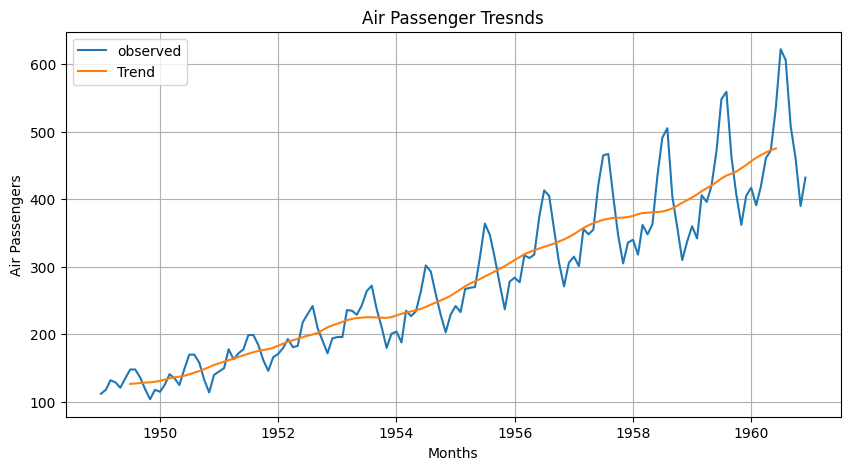

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(Q.observed, label='observed')
plt.plot(Q.trend, label='Trend')
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Air Passenger Tresnds')
plt.legend()
plt.grid()
plt.show()

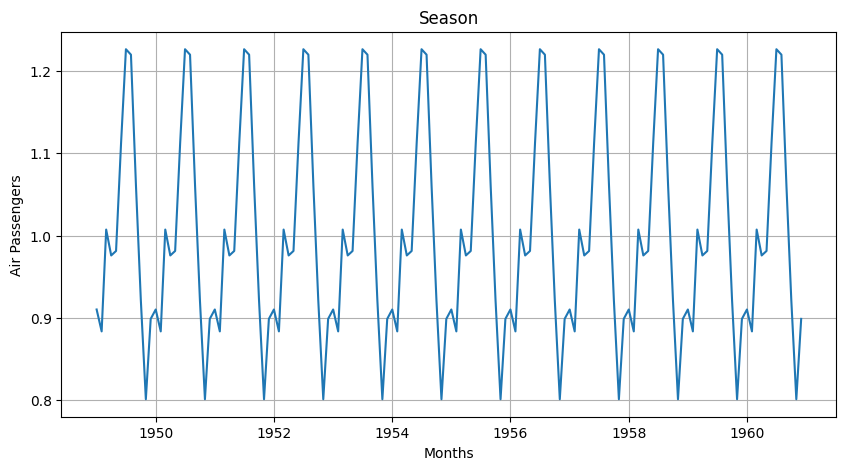

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(Q.seasonal)
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Season')
plt.grid()
plt.show()

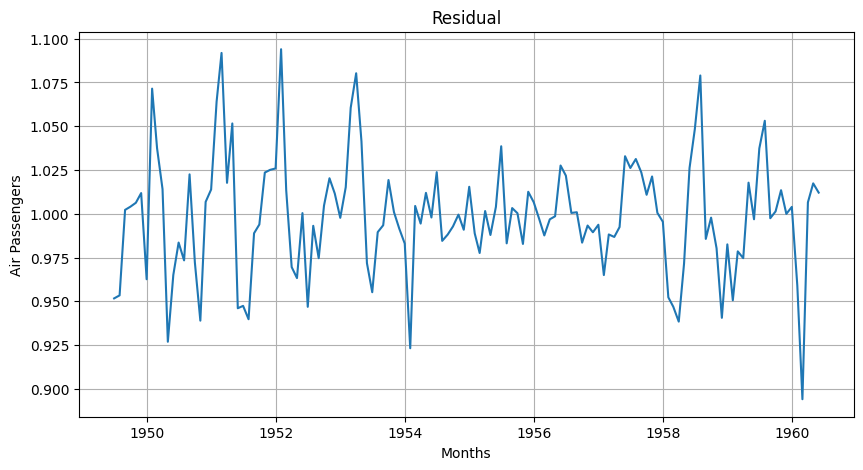

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(Q.resid)
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Residual')
plt.grid()
plt.show()